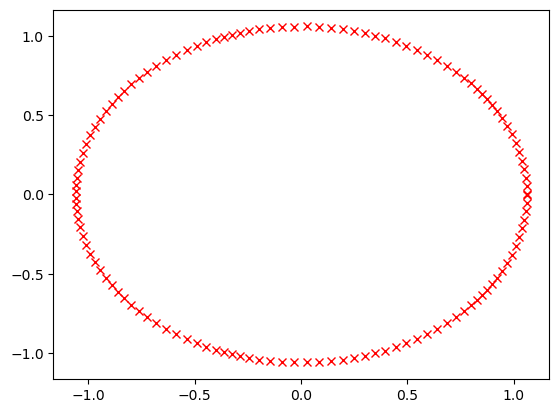

In [13]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

theta = np.linspace(0, 2*np.pi, 128)

#curve 
n = 5
epsilon = 0.1
space_theta = theta[1] - theta[0]
r = 1 + epsilon*np.cos(n*theta)
X = r*np.cos(theta)
Y = r*np.sin(theta)

X_forward_one = np.roll(X, shift=1) #shift element in X array to the right by one unit
Y_forward_one = np.roll(Y, shift=1) #shift element in Y array to the right by one unit

length_curve_initial = np.linalg.norm(np.sqrt((X_forward_one-X)**2+ (Y_forward_one-Y)**2),1) # length of initial curve
length_curve_list = [] #store the difference between length of curve at each time and length of initial curve 
t_interval = [] # record the corresponding time of each element in length_curve_list

def myode(y, t, h, H, N):
    return (1 - h*H)*N

def simpson(h,integrand): # function for simpson rule
    integral_value = 0
    i = 0
    integrand_forward = np.concatenate([[integrand[-1]], integrand[:-1]])
    integrand_backward = np.concatenate([integrand[1:], [integrand[0]]])
    while i < len(integrand):
        integral_value = integral_value + h*(integrand_forward[i] + 4*integrand[i] + integrand_backward[i])/3
        i = i + 1
    return integral_value

def mean_curvature(theta, r): #function for calculating mean curvature
    space_theta = theta[1] - theta[0]
    r_prime = np.gradient(np.concatenate([[r[-1]], r, [r[0]]]), space_theta)[1:-1]
    r_double_prime = np.gradient(np.concatenate([[r_prime[-1]], r_prime, [r_prime[0]]]), space_theta)[1:-1]
    H = (2*(r_prime**2) + r**2 - r*r_double_prime)/((r_prime**2 + r**2)**1.5)
    return H

for i in range(10000):

    r = np.sqrt(X**2 + Y**2) #radius at each moment

    #unit tangent
    T_x = np.gradient(np.concatenate([[X[-1]], X, [X[0]]]), space_theta)[1:-1]
    T_y = np.gradient(np.concatenate([[Y[-1]], Y, [Y[0]]]), space_theta)[1:-1]
    tangent_len = np.sqrt(T_x**2 + T_y**2)
    T_x = T_x/tangent_len
    T_y = T_y/tangent_len

    #unit normal
    N_x = T_y
    N_y = -T_x

    H = mean_curvature(theta, r)

    #constant h
    H_ds = H*np.sqrt(np.gradient(r, theta)**2 + r**2)
    H_ds = np.concatenate([[H_ds[-1]], H_ds, [H_ds[0]]])

    H2_ds = (H**2)*np.sqrt(np.gradient(r, theta)**2 + r**2)
    H2_ds = np.concatenate([[H2_ds[-1]], H2_ds, [H2_ds[0]]])

    h = simpson(space_theta, H_ds)/simpson(space_theta, H2_ds)

    X_forward_one = np.roll(X, -1) #shift element in X array to the right by one unit
    Y_forward_one = np.roll(Y, -1) #shift element in Y array to the right by one unit
    length_curve = np.linalg.norm(np.sqrt((X_forward_one-X)**2+ (Y_forward_one-Y)**2),1) # calculate length of curve at this time
    length_curve_list.append(length_curve-length_curve_initial) #append the difference between length of curve at this time and length of initial curve to the array
    t_interval.append(0.01*i) #append the current time interval to time record array

    #implementation of ode to find X and Y after dt = 0.01;
    tspan = np.linspace(0,0.001, 500)
    ic = X
    x = odeint(myode, ic, tspan, args=(h,H,N_x))
    X = x[-1]

    ic = Y
    y = odeint(myode, ic, tspan, args=(h,H,N_y))
    Y = y[-1]

    X_forward_one = np.roll(X, -1) #shift element in X array to the right by one unit
    Y_forward_one = np.roll(Y, -1) #shift element in Y array to the right by one unit
    length_curve = np.linalg.norm(np.sqrt((X_forward_one-X)**2+ (Y_forward_one-Y)**2),1) # calculate length of curve at this time
    length_curve_list.append(length_curve-length_curve_initial) #append the difference between length of curve at this time and length of initial curve to the array
    t_interval.append(0.001*i) #append the current time interval to time record array

#plt.plot(t_interval, length_curve_list, 'bx') # plot the graphe of the difference between length of curve at this time and length of initial curve against time
plt.plot(X, Y, 'rx') # plot the final curve